# Privacy and utility tradeoff (experiments 6 and 7, issue 120)

* Synthetic methods: synthpop and CTGAN
* Dataset: datasets/polish_data_2011/polish_data_2011

For more information, refer to Experiments 6 and 7 in this issue: https://github.com/alan-turing-institute/QUIPP-collab/issues/120

In [1]:
import glob
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os

## Inputs

In [2]:
# path to synthpop results (QUIPP pipeline)
synthpop_paths = "./outputs/synth-output_polish_6_cols_random_*/polish-synthpop-*"
# How to plot the results, options: scatter (default) or line
# "scatter" should be used when several results are going to be plotted in one figure
plot_type = "scatter"

# CTGAN path/colors/labels
ctgan_paths = ["./outputs/ctgan_synth-output_polish_6_cols/ctgan-polish-1",
               "./outputs/ctgan_synth-output_polish_6_cols/ctgan-polish-2",
               "./outputs/ctgan_synth-output_polish_6_cols/ctgan-polish-3"]
ctgan_colors = ["cyan", "blue", "red"]
ctgan_labels = ["CTGAN, 100", "CTGAN, 500", "CTGAN, 2000"]

# Privacy metric to be plotted
# options:"EMRi_norm" and "TMRi_norm"
privacy_metric = "EMRi_norm"

## Plot

Plot synthpop outputs
Plot CTGAN outputs


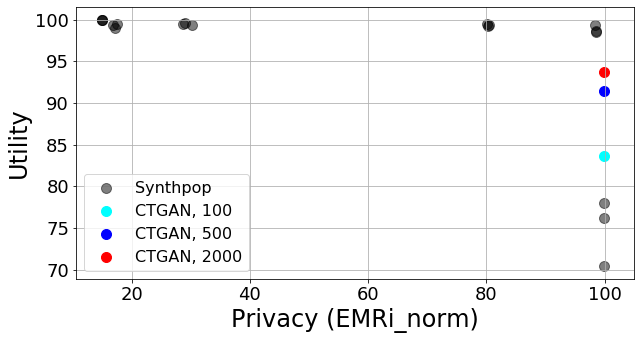

In [3]:
# --- Synthpop
print("Plot synthpop outputs")
syn_dirs = glob.glob(synthpop_paths)
syn_dirs.sort()

collect_privacy = []
collect_utility = []
counter = []
for i, one_syn in enumerate(syn_dirs):
    # - disclosure risk
    disclosure_fio = open(os.path.join(one_syn, "disclosure_risk.json"))
    disclosure = json.load(disclosure_fio)
    # normalize
    collect_privacy.append(100. - disclosure[privacy_metric]*100)
    
    # - utility
    utility_fio = open(os.path.join(one_syn, "utility_overall_diff.json"))
    utility = json.load(utility_fio)
    collect_utility.append(100. - utility["overall"]["f1"]["weighted"]*100.)
    counter.append(str(i+1))

plt.figure(figsize=(10, 5))
if plot_type == "scatter":
    plt.scatter(collect_privacy, 
                collect_utility, 
                s=100, 
                c="k", edgecolor="k", 
                alpha=0.5, 
                label="Synthpop")
else:
    plt.plot(collect_privacy, 
             collect_utility, 
             markersize=10, 
             ls='-', marker="o",
             c="k", 
             alpha=1.0, 
             label="Synthpop")

# --- CTGAN
print("Plot CTGAN outputs")
for igan, ctgan_path in enumerate(ctgan_paths):
    syn_dirs = glob.glob(ctgan_path)
    syn_dirs.sort()

    collect_privacy = []
    collect_utility = []
    counter = []
    for i, one_syn in enumerate(syn_dirs):
        # - disclosure risk
        disclosure_fio = open(os.path.join(one_syn, "disclosure_risk.json"))
        disclosure = json.load(disclosure_fio)
        # normalize
        collect_privacy.append(100. - disclosure[privacy_metric]*100)
        
        # - utility
        utility_fio = open(os.path.join(one_syn, "utility_overall_diff.json"))
        utility = json.load(utility_fio)
        collect_utility.append(100. - utility["overall"]["f1"]["weighted"]*100.)
        counter.append(str(i+1))

    plt.scatter(collect_privacy, 
                collect_utility, 
                s=100, 
                c=ctgan_colors[igan], edgecolor=ctgan_colors[igan], 
                alpha=1.0,
                label=ctgan_labels[igan])

# for i in range(len(collect_privacy)):
#     plt.text(collect_privacy[i] - 0.15, 
#              collect_utility[i] + 0.1, 
#              counter[i], 
#              size=18, c='r')

plt.xlabel(f"Privacy ({privacy_metric})", size=24, color="black")
plt.ylabel("Utility", size=24, color="black")
plt.xlim(xmax=105)
plt.xticks(size=18, color="black")
plt.yticks(size=18, color="black")
plt.grid()
plt.legend(prop={'size': 16})
plt.show()